In [5]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client as FDSN_Client
from obspy import read_inventory
from obspy import Stream

In [6]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
client = FDSN_Client("IRIS")
print(client)
starttime = "2008-07-10 11:00:00.000"
endtime = "2008-12-29 11:00:00.000"

FDSN Webservice Client (base url: http://service.iris.edu)
Available Services: 'dataselect' (v1.1.9), 'event' (v1.1.13), 'station' (v1.1.52), 'available_event_catalogs', 'available_event_contributors'

Use e.g. client.help('dataselect') for the
parameter description of the individual services
or client.help() for parameter description of
all webservices.


Inventory created at 2023-07-05T09:20:01.887200Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.52
		    http://service.iris.edu/fdsnws/station/1/query?starttime=2008-07-...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (3):
			IC, RM, SY
		Stations (13):
			IC.QIZ (Qiongzhong, Hainan Province, China)
			RM.DLV (Dalat Central Vietnam)
			RM.SLV (Son La Vietnam)
			SY.CHBT (CHBT synthetic)
			SY.CMAI (CMAI synthetic)
			SY.DLV (DLV synthetic)
			SY.NAYO (NAYO synthetic)
			SY.NONG (NONG synthetic)
			SY.PANO (PANO synthetic)
			SY.QIZ (QIZ synthetic)
			SY.SLV (SLV synthetic)
			SY.UBPT (UBPT synthetic)
			SY.VIVO (VIVO synthetic)
		Channels (0):



C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size


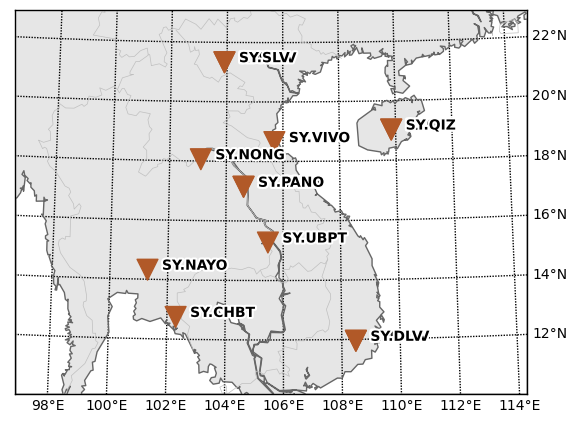

[<obspy.core.inventory.network.Network object at 0x000001B59B076050>, <obspy.core.inventory.network.Network object at 0x000001B59C5A0F10>, <obspy.core.inventory.network.Network object at 0x000001B59CD6AF50>]


In [44]:
inventory = client.get_stations(latitude=15.387552,longitude=109.121441,maxradius=7.8, starttime=starttime, endtime=endtime)
print(inventory)
_=inventory.plot(projection="local")
_.savefig('station.png')
print(inventory.networks)

In [45]:
#Ghi các tọa độ các điểm vào file txt
inventory = client.get_stations(latitude=15.387552,longitude=109.121441,maxradius=7.8, starttime=starttime, endtime=endtime)
with open('station_VN.txt', 'w') as file:
    for network in inventory:
        for station in network:
            latitude = station.latitude
            longitude = station.longitude
            file.write(f'{latitude}, {longitude}\n')

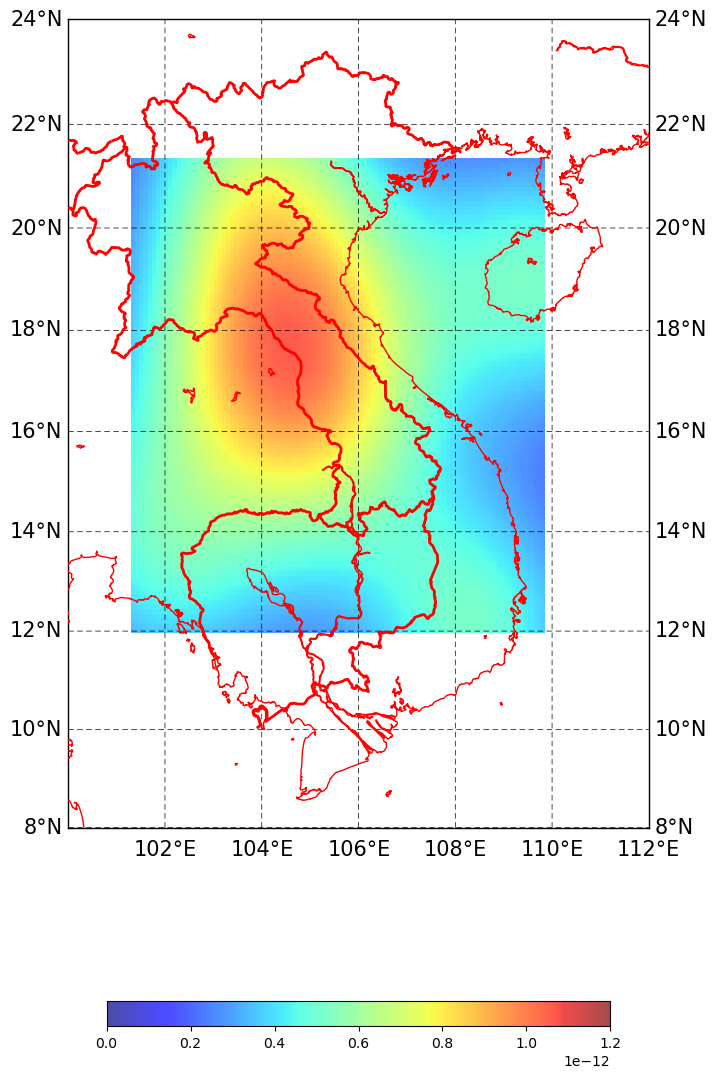

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde

# Đọc tọa độ từ file text
data = np.loadtxt('station_VN.txt', delimiter=',', unpack=True)
lat, lon = data[0,:], data[1,:]

# Tạo đối tượng Basemap
m = Basemap(llcrnrlon=100, llcrnrlat=8, urcrnrlon=112, urcrnrlat=24, resolution='h', projection='merc')

# Chuyển đổi tọa độ của các điểm sang hệ tọa độ của bản đồ
x, y = m(lon, lat)

# Tạo đối tượng gaussian-kde
kde = gaussian_kde(np.vstack([x, y]))

# Tính toán mật độ dữ liệu tại các điểm trên một lưới 2D
xmin, xmax = x.min(), x.max()
ymin, ymax = y.min(), y.max()
xi, yi = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
zi = np.reshape(kde(np.vstack([xi.flatten(), yi.flatten()])), xi.shape)

# Vẽ mật độ
fig, ax = plt.subplots(figsize=(10,15))
norm = plt.Normalize(vmin=0, vmax=1.2e-12)
im = ax.imshow(zi.T, origin='lower', extent=[xmin, xmax, ymin, ymax], cmap='jet',alpha=0.7, norm =norm)
fig.colorbar(im, orientation='horizontal', location='bottom',shrink=0.65)

# Vẽ bản đồ
# vĩ tuyến
m.drawparallels(circles= np.array([8,10,12, 14,16,18,20,22,24]), labels= [1, 1, 0, 0],dashes=[8,5], linewidth= 0.5, fontsize= 15)
#kinh tuyến
m.drawmeridians(meridians= np.array([102,104,106, 108, 110, 112]), labels=[0,0,0,1], dashes=[8,5], linewidth=0.5, fontsize=15)
# đường bờ biển
m.drawcoastlines(linewidth=1, linestyle='solid', color='r', antialiased=1, ax=None, zorder=None)
# đường biên giới
m.drawmapboundary(color='k', linewidth=1, fill_color=None, zorder=-1, ax=None)
# Bổ sung đường biên giới của Việt Nam bằng màu đỏ dựa trên long lat
m.drawcountries(color='r', linewidth= 2)

plt.savefig('./density_station.png')
plt.show()

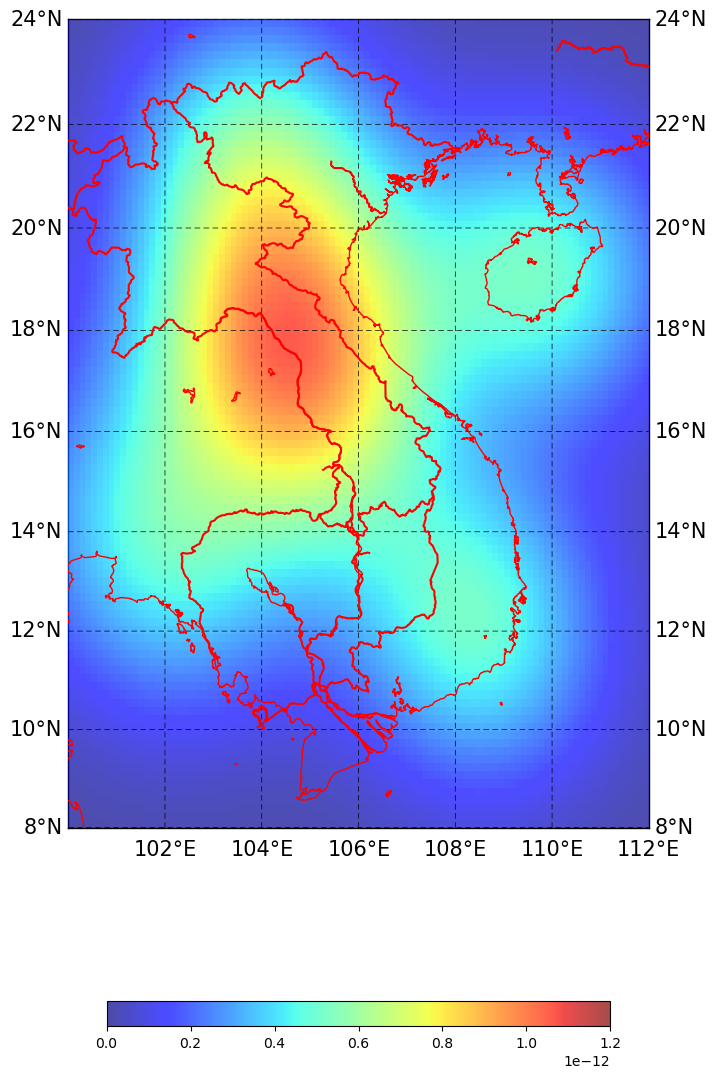

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde

# Đọc tọa độ từ file text
data = np.loadtxt('station_VN.txt', delimiter=',', unpack=True)
lat, lon = data[0,:], data[1,:]

# Tạo đối tượng Basemap
m = Basemap(llcrnrlon=100, llcrnrlat=8, urcrnrlon=112, urcrnrlat=24, resolution='h', projection='merc')

# Chuyển đổi tọa độ của các điểm sang hệ tọa độ của bản đồ
x, y = m(lon, lat)

# Tạo lưới tọa độ
numcols, numrows = 100, 100
lons = np.linspace(100, 112, numcols)
lats = np.linspace(8, 24, numrows)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Tạo đối tượng gaussian_kde
kde = gaussian_kde(np.vstack([x, y]))

# Tính toán mật độ dữ liệu tại các điểm trên lưới 2D
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
zi = zi.reshape((numrows, numcols))

# Vẽ mật độ
fig, ax = plt.subplots(figsize=(10,15))
norm = plt.Normalize(vmin=0, vmax=1.2e-12)
im = ax.imshow(zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()], cmap='jet', origin='lower', alpha=0.7, norm =norm)
plt.colorbar(im, orientation='horizontal', location='bottom', shrink=0.65)

# Vẽ bản đồ
# vĩ tuyến
m.drawparallels(circles= np.array([8,10,12, 14,16,18,20,22,24]), labels= [1, 1, 0, 0],dashes=[8,5], linewidth= 0.5, fontsize= 15)
#kinh tuyến
m.drawmeridians(meridians= np.array([102,104,106, 108, 110, 112]), labels=[0,0,0,1], dashes=[8,5], linewidth=0.5, fontsize=15)
# đường bờ biển
m.drawcoastlines(linewidth=1, linestyle='solid', color='r', antialiased=1, ax=None, zorder=None)
# đường biên giới
m.drawmapboundary(color='black', linewidth=1, fill_color=None, zorder=-1, ax=None)
# Bổ sung đường biên giới của Việt Nam bằng màu đỏ dựa trên long lat
m.drawcountries(color='r', linewidth= 1.5)

plt.savefig('./density_stationVN.png')
plt.show()

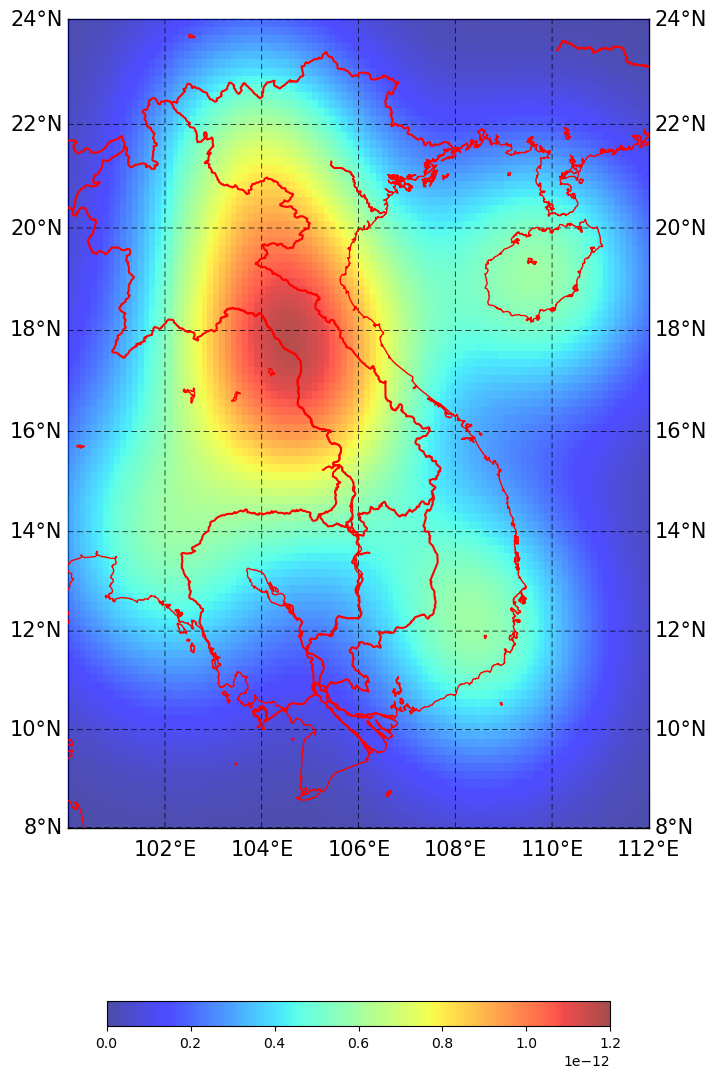

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde

# Đọc tọa độ từ file text
data = np.loadtxt('station_VN.txt', delimiter=',', unpack=True)
lat, lon = data[0,:], data[1,:]

# Tạo đối tượng Basemap
m = Basemap(llcrnrlon=100, llcrnrlat=8, urcrnrlon=112, urcrnrlat=24, resolution='h', projection='merc')

# Chuyển đổi tọa độ của các điểm sang hệ tọa độ của bản đồ
x, y = m(lon, lat)

# Tạo lưới tọa độ
numcols, numrows = 100, 100
lons = np.linspace(100, 112, numcols)
lats = np.linspace(8, 24, numrows)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Tạo đối tượng gaussian_kde
kde = gaussian_kde(np.vstack([x, y]), bw_method = 0.6)

# Tính toán mật độ dữ liệu tại các điểm trên lưới 2D
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
zi = zi.reshape((numrows, numcols))

# Vẽ mật độ
fig, ax = plt.subplots(figsize=(10,15))
norm = plt.Normalize(vmin=0, vmax=1.2e-12)
im = ax.imshow(zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()], cmap='jet', origin='lower', norm =norm, alpha=0.7)
plt.colorbar(im, orientation='horizontal', location='bottom', shrink=0.65)

# Vẽ bản đồ
# vĩ tuyến
m.drawparallels(circles= np.array([8,10,12, 14,16,18,20,22,24]), labels= [1, 1, 0, 0],dashes=[8,5], linewidth= 0.5, fontsize= 15)
#kinh tuyến
m.drawmeridians(meridians= np.array([102,104,106, 108, 110, 112]), labels=[0,0,0,1], dashes=[8,5], linewidth=0.5, fontsize=15)
# đường bờ biển
m.drawcoastlines(linewidth=1, linestyle='solid', color='r', antialiased=1, ax=None, zorder=None)
# đường biên giới
m.drawmapboundary(color='black', linewidth=1, fill_color=None, zorder=-1, ax=None)
# Bổ sung đường biên giới của Việt Nam bằng màu đỏ dựa trên long lat
m.drawcountries(color='r', linewidth= 1.5)

plt.savefig('./density_stationVN1.png')
plt.show()

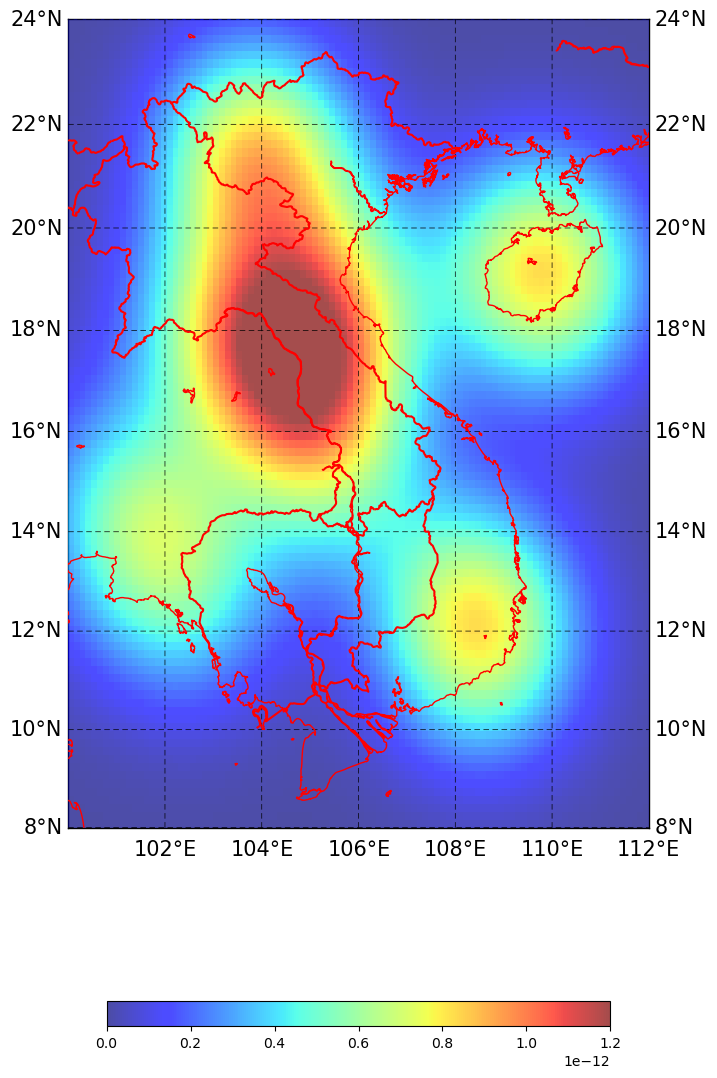

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde

# Đọc tọa độ từ file text
data = np.loadtxt('station_VN.txt', delimiter=',', unpack=True)
lat, lon = data[0,:], data[1,:]

# Tạo đối tượng Basemap
m = Basemap(llcrnrlon=100, llcrnrlat=8, urcrnrlon=112, urcrnrlat=24, resolution='h', projection='merc')

# Chuyển đổi tọa độ của các điểm sang hệ tọa độ của bản đồ
x, y = m(lon, lat)

# Tạo lưới tọa độ
numcols, numrows = 100, 100
lons = np.linspace(100, 112, numcols)
lats = np.linspace(8, 24, numrows)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Tạo đối tượng gaussian_kde
kde = gaussian_kde(np.vstack([x, y]), bw_method = 0.5)

# Tính toán mật độ dữ liệu tại các điểm trên lưới 2D
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
zi = zi.reshape((numrows, numcols))

# Vẽ mật độ
fig, ax = plt.subplots(figsize=(10,15))
norm = plt.Normalize(vmin=0, vmax=1.2e-12)
im = ax.imshow(zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()], cmap='jet', origin='lower', norm =norm, alpha=0.7)
plt.colorbar(im, orientation='horizontal', location='bottom', shrink=0.65)

# Vẽ bản đồ
# vĩ tuyến
m.drawparallels(circles= np.array([8,10,12, 14,16,18,20,22,24]), labels= [1, 1, 0, 0],dashes=[8,5], linewidth= 0.5, fontsize= 15)
#kinh tuyến
m.drawmeridians(meridians= np.array([102,104,106, 108, 110, 112]), labels=[0,0,0,1], dashes=[8,5], linewidth=0.5, fontsize=15)
# đường bờ biển
m.drawcoastlines(linewidth=1, linestyle='solid', color='r', antialiased=1, ax=None, zorder=None)
# đường biên giới
m.drawmapboundary(color='black', linewidth=1, fill_color=None, zorder=-1, ax=None)
# Bổ sung đường biên giới của Việt Nam bằng màu đỏ dựa trên long lat
m.drawcountries(color='r', linewidth= 1.5)

plt.savefig('./density_stationVN2.png')
plt.show()

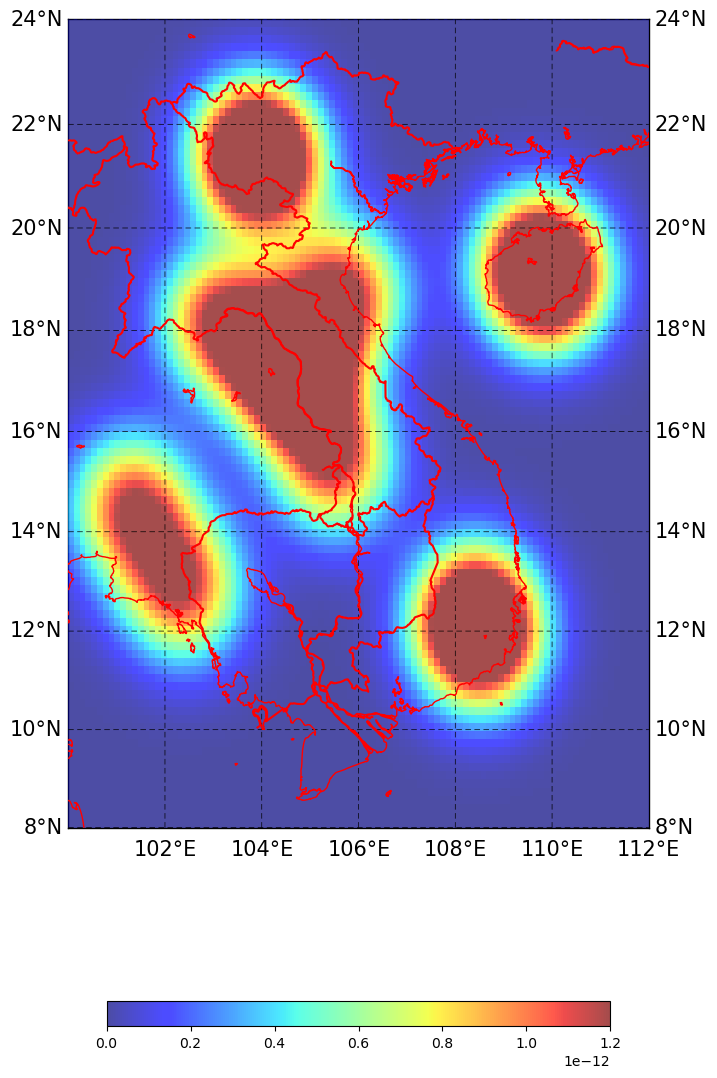

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import gaussian_kde

# Đọc tọa độ từ file text
data = np.loadtxt('station_VN.txt', delimiter=',', unpack=True)
lat, lon = data[0,:], data[1,:]

# Tạo đối tượng Basemap
m = Basemap(llcrnrlon=100, llcrnrlat=8, urcrnrlon=112, urcrnrlat=24, resolution='h', projection='merc')

# Chuyển đổi tọa độ của các điểm sang hệ tọa độ của bản đồ
x, y = m(lon, lat)

# Tạo lưới tọa độ
numcols, numrows = 100, 100
lons = np.linspace(100, 112, numcols)
lats = np.linspace(8, 24, numrows)
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

# Tạo đối tượng gaussian_kde
kde = gaussian_kde(np.vstack([x, y]), bw_method = 0.3)

# Tính toán mật độ dữ liệu tại các điểm trên lưới 2D
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))
zi = zi.reshape((numrows, numcols))

# Vẽ mật độ
fig, ax = plt.subplots(figsize=(10,15))
norm = plt.Normalize(vmin=0, vmax=1.2e-12)
im = ax.imshow(zi, extent=[xi.min(), xi.max(), yi.min(), yi.max()], cmap='jet', origin='lower', norm =norm, alpha=0.7)
plt.colorbar(im, orientation='horizontal', location='bottom', shrink=0.65)

# Vẽ bản đồ
# vĩ tuyến
m.drawparallels(circles= np.array([8,10,12, 14,16,18,20,22,24]), labels= [1, 1, 0, 0],dashes=[8,5], linewidth= 0.5, fontsize= 15)
#kinh tuyến
m.drawmeridians(meridians= np.array([102,104,106, 108, 110, 112]), labels=[0,0,0,1], dashes=[8,5], linewidth=0.5, fontsize=15)
# đường bờ biển
m.drawcoastlines(linewidth=1, linestyle='solid', color='r', antialiased=1, ax=None, zorder=None)
# đường biên giới
m.drawmapboundary(color='black', linewidth=1, fill_color=None, zorder=-1, ax=None)
# Bổ sung đường biên giới của Việt Nam bằng màu đỏ dựa trên long lat
m.drawcountries(color='r', linewidth= 1.5)

plt.savefig('./density_stationVN3.png')
plt.show()